In [1]:
project = 'BitcoinWallet'
# 'JHotDraw', 'JEdit', 'SweetHome3D', 'BitcoinWallet', 'K9Mail'
prjfile = project.lower()

In [2]:
import pandas as pd

nodes = pd.read_csv(f"{prjfile}-cd-nodes.csv")
# edges = pd.read_csv(f"{prjfile}-cd-edges.csv")

nodes.shape #, edges.shape

(15, 14)

In [3]:
nodes['level'] = [l if l==0 else 1 for l in nodes['level']]

note: 

communities [louvain] uses the parameters:

- algorithm = Louvain
- weight column = weight
- parameters:
  - directed = True
  - overlapping = False
  - random gen seed = 42
  - resolution = 1 for projects with > 200 classes, 2 otherwise
  - deep hierarchy = False

In [4]:
nodes['members'] = [set(l.split(" ")) for l in nodes['CD_MemberList']]

nodes.sort_values(by=['level'], ascending=False, inplace=True)
indices = list(nodes.index)

df = nodes[['name', 'CD_MemberList_Size', 'members', 'level']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,level
1,C120431,36,"{SendingAddressesViewModel, PeerListFragment.V...",1.0
2,C120432,28,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",1.0
3,C120433,28,"{MaintenanceDialogFragment.State, EncryptKeysD...",1.0
4,C120434,23,"{SendCoinsQrActivity, InputParser.StringInputP...",1.0
5,C120435,15,"{WalletAddressViewModel, ConfigOwnNameLiveData...",1.0
11,C120441,6,"{RequestCoinsFragment, CurrencyAmountView, Cur...",1.0
12,C120442,4,{RequestWalletBalanceTask.JsonRpcResponse.Utxo...,1.0
13,C120443,4,"{DirectPaymentTask.ResultCallback, DirectPayme...",1.0
14,C120444,2,"{RequestWalletBalanceTask.ElectrumServer, Requ...",1.0
0,C120445,196,"{SendCoinsQrActivity, EncryptKeysDialogFragmen...",0.0


note: level currently assumes non-deep communities with manual editing in cytoscape. should be automated:

- visited nodes <- []
- remaining nodes <- all nodes
- find sink (node with no outgoing edges)
- assign level 0 to sink
- add sink to visited nodes
- remove sink from remaining nodes
- while there are remaining nodes:
  - find nodes in remaining nodes that has edge to visited nodes
  - assign level +1 to those nodes
  - add those nodes to visited nodes
  - remove those nodes from remaining nodes

In [5]:
nodes['my_members_str'] = ["" for i in indices]
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_str']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_str
1,C120431,36,"{SendingAddressesViewModel, PeerListFragment.V...",
2,C120432,28,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",
3,C120433,28,"{MaintenanceDialogFragment.State, EncryptKeysD...",
4,C120434,23,"{SendCoinsQrActivity, InputParser.StringInputP...",
5,C120435,15,"{WalletAddressViewModel, ConfigOwnNameLiveData...",
11,C120441,6,"{RequestCoinsFragment, CurrencyAmountView, Cur...",
12,C120442,4,{RequestWalletBalanceTask.JsonRpcResponse.Utxo...,
13,C120443,4,"{DirectPaymentTask.ResultCallback, DirectPayme...",
14,C120444,2,"{RequestWalletBalanceTask.ElectrumServer, Requ...",
0,C120445,196,"{SendCoinsQrActivity, EncryptKeysDialogFragmen...",


In [6]:
visited = { n for n in nodes.loc[indices[0],'members'] }
nodes.loc[indices[0],'my_members_str'] = ' '.join(visited)


In [7]:
for idx in range(1,len(indices)):
  i = indices[idx-1]
  j = indices[idx]
  my_nodes = nodes.loc[j,'members'] - visited
  visited |= my_nodes
  # print(nodes.loc[j,'name'])
  # print("then",nodes.loc[j,'members'])
  # print(" now",my_nodes)
  nodes.loc[j,'my_members_str'] = ' '.join(my_nodes)

nodes['my_members'] = [set(l.split(" ")) if l else set() for l in nodes['my_members_str']]
nodes['my_members_size'] = [len(l) for l in nodes['my_members']]


In [8]:
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_size', 'my_members', 'level']]

pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_size,my_members,level
1,C120431,36,"{SendingAddressesViewModel, PeerListFragment.V...",36,"{SendingAddressesViewModel, PeerListFragment.V...",1.0
2,C120432,28,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",28,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",1.0
3,C120433,28,"{MaintenanceDialogFragment.State, EncryptKeysD...",28,"{MaintenanceDialogFragment.State, WalletAddres...",1.0
4,C120434,23,"{SendCoinsQrActivity, InputParser.StringInputP...",23,"{SendCoinsQrActivity, InputParser.StringInputP...",1.0
5,C120435,15,"{WalletAddressViewModel, ConfigOwnNameLiveData...",15,"{WalletAddressViewModel, ConfigOwnNameLiveData...",1.0
11,C120441,6,"{RequestCoinsFragment, CurrencyAmountView, Cur...",6,"{RequestCoinsFragment, CurrencyAmountView, Cur...",1.0
12,C120442,4,{RequestWalletBalanceTask.JsonRpcResponse.Utxo...,4,"{RequestWalletBalanceTask.ResultCallback, Requ...",1.0
13,C120443,4,"{DirectPaymentTask.ResultCallback, DirectPayme...",4,"{DirectPaymentTask, DirectPaymentTask.ResultCa...",1.0
14,C120444,2,"{RequestWalletBalanceTask.ElectrumServer, Requ...",2,"{RequestWalletBalanceTask.ElectrumServer, Requ...",1.0
0,C120445,196,"{SendCoinsQrActivity, EncryptKeysDialogFragmen...",0,{},0.0


In [9]:
from functools import reduce

all = reduce(lambda x,y: x|y, nodes['my_members'])
len(all)

196

In [10]:
nodes.columns

Index(['CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
       'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
       'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
       'CD_MemberList_LogSize', 'CD_MemberList_Size', 'level', 'name',
       'selected', 'shared name', 'wordcloud.sync', 'members',
       'my_members_str', 'my_members', 'my_members_size'],
      dtype='object')

In [11]:
c_nodes = nodes.drop(nodes[nodes.my_members_str.map(len)==0].index)
c_nodes = c_nodes.drop(columns=[
      'CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
      'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
      'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
      'CD_MemberList_LogSize', 'CD_MemberList_Size',
      'selected', 'shared name', 'members', 'my_members_str', 
      'my_members_size'])
c_nodes.rename(columns={'name':'id', 'my_members':'members'}, inplace=True)
df = c_nodes
pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members
1,1.0,C120431,NaN,"{SendingAddressesViewModel, PeerListFragment.V..."
2,1.0,C120432,NaN,"{ExchangeRatesFragment, MaybeMaintenanceViewMo..."
3,1.0,C120433,NaN,"{MaintenanceDialogFragment.State, WalletAddres..."
4,1.0,C120434,NaN,"{SendCoinsQrActivity, InputParser.StringInputP..."
5,1.0,C120435,NaN,"{WalletAddressViewModel, ConfigOwnNameLiveData..."
10,1.0,C120440,NaN,"{CameraManager, ScanActivity, SingleLiveEvent,..."
11,1.0,C120441,NaN,"{RequestCoinsFragment, CurrencyAmountView, Cur..."
12,1.0,C120442,NaN,"{RequestWalletBalanceTask.ResultCallback, Requ..."
13,1.0,C120443,NaN,"{DirectPaymentTask, DirectPaymentTask.ResultCa..."
14,1.0,C120444,NaN,"{RequestWalletBalanceTask.ElectrumServer, Requ..."


note: community nodes are named using 3 most recurring words in member class names

other ideas:

- use the name of the largest class
- use the name of "central" class in the community (e.g., most ingoing + outgoing edges?)

In [14]:
import re
from collections import Counter

names = ['-'.join([name for name, _ in Counter(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))).most_common(3)]) for members in c_nodes['members']]

words = [' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))) for members in c_nodes['members']]

In [15]:
c_nodes['name'] = names
c_nodes['words'] = words
c_nodes['id'] = names
c_nodes['members_str'] = [' '.join(m) for m in c_nodes['members']]
# for line in [' '.join(s) for s in c_nodes['members']]:
#   print(line)
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,words,members_str
1,1.0,Live-Data-View,NaN,"{SendingAddressesViewModel, PeerListFragment.V...",Live-Data-View,Sending Addresses View Model Peer List Fragmen...,SendingAddressesViewModel PeerListFragment.Vie...
2,1.0,View-Wallet-Fragment,NaN,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",View-Wallet-Fragment,Exchange Rates Fragment Maybe Maintenance View...,ExchangeRatesFragment MaybeMaintenanceViewMode...
3,1.0,Fragment-Wallet-Dialog,NaN,"{MaintenanceDialogFragment.State, WalletAddres...",Fragment-Wallet-Dialog,Maintenance Dialog Fragment State Wallet Addre...,MaintenanceDialogFragment.State WalletAddresse...
4,1.0,Wallet-Input-Parser,NaN,"{SendCoinsQrActivity, InputParser.StringInputP...",Wallet-Input-Parser,Send Coins Qr Activity Input Parser String Inp...,SendCoinsQrActivity InputParser.StringInputPar...
5,1.0,Wallet-Address-Live,NaN,"{WalletAddressViewModel, ConfigOwnNameLiveData...",Wallet-Address-Live,Wallet Address View Model Config Own Name Live...,WalletAddressViewModel ConfigOwnNameLiveData C...
10,1.0,Scan-Activity-View,NaN,"{CameraManager, ScanActivity, SingleLiveEvent,...",Scan-Activity-View,Camera Manager Scan Activity Single Live Event...,CameraManager ScanActivity SingleLiveEvent Sca...
11,1.0,Currency-View-Amount,NaN,"{RequestCoinsFragment, CurrencyAmountView, Cur...",Currency-View-Amount,Request Coins Fragment Currency Amount View Cu...,RequestCoinsFragment CurrencyAmountView Curren...
12,1.0,Request-Wallet-Balance,NaN,"{RequestWalletBalanceTask.ResultCallback, Requ...",Request-Wallet-Balance,Request Wallet Balance Task Result Callback Re...,RequestWalletBalanceTask.ResultCallback Reques...
13,1.0,Payment-Task-Direct,NaN,"{DirectPaymentTask, DirectPaymentTask.ResultCa...",Payment-Task-Direct,Direct Payment Task Direct Payment Task Result...,DirectPaymentTask DirectPaymentTask.ResultCall...
14,1.0,Request-Wallet-Balance,NaN,"{RequestWalletBalanceTask.ElectrumServer, Requ...",Request-Wallet-Balance,Request Wallet Balance Task Electrum Server Re...,RequestWalletBalanceTask.ElectrumServer Reques...


In [16]:

o_nodes = pd.read_csv(f"{prjfile}-nodes.csv")
o_edges = pd.read_csv(f"{prjfile}-edges.csv")

remains = o_nodes[~o_nodes['name'].isin(all)].copy()
remains.drop(columns=['type'], inplace=True)
remains['level'] = [0 for _ in remains['name']]
remains['id'] = remains['name']
remains['members'] = [set([name]) for name in remains['name']]
remains['members_str'] = remains['name']
words = [' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))) for members in remains['members']]
remains['words'] = words

remains

,id,name,package,level,members,members_str,words
1,Constants,Constants,de.schildbach.wallet,0,{Constants},Constants,Constants
2,Constants.Files,Constants.Files,de.schildbach.wallet,0,{Constants.Files},Constants.Files,Constants Files
3,Logging,Logging,de.schildbach.wallet,0,{Logging},Logging,Logging
50,AddressBookActivity.TwoFragmentAdapter,AddressBookActivity.TwoFragmentAdapter,de.schildbach.wallet.ui,0,{AddressBookActivity.TwoFragmentAdapter},AddressBookActivity.TwoFragmentAdapter,Address Book Activity Two Fragment Adapter
52,BitmapFragment,BitmapFragment,de.schildbach.wallet.ui,0,{BitmapFragment},BitmapFragment,Bitmap Fragment
61,DividerItemDecoration,DividerItemDecoration,de.schildbach.wallet.ui,0,{DividerItemDecoration},DividerItemDecoration,Divider Item Decoration
74,HelpDialogFragment,HelpDialogFragment,de.schildbach.wallet.ui,0,{HelpDialogFragment},HelpDialogFragment,Help Dialog Fragment
82,ProgressDialogFragment,ProgressDialogFragment,de.schildbach.wallet.ui,0,{ProgressDialogFragment},ProgressDialogFragment,Progress Dialog Fragment
95,ShowPasswordCheckListener,ShowPasswordCheckListener,de.schildbach.wallet.ui,0,{ShowPasswordCheckListener},ShowPasswordCheckListener,Show Password Check Listener
96,StickToTopLinearLayoutManager,StickToTopLinearLayoutManager,de.schildbach.wallet.ui,0,{StickToTopLinearLayoutManager},StickToTopLinearLayoutManager,Stick To Top Linear Layout Manager


In [17]:
c_nodes = c_nodes.append(remains, ignore_index = True)
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,words,members_str,package
0,1.0,Live-Data-View,NaN,"{SendingAddressesViewModel, PeerListFragment.V...",Live-Data-View,Sending Addresses View Model Peer List Fragmen...,SendingAddressesViewModel PeerListFragment.Vie...,NaN
1,1.0,View-Wallet-Fragment,NaN,"{ExchangeRatesFragment, MaybeMaintenanceViewMo...",View-Wallet-Fragment,Exchange Rates Fragment Maybe Maintenance View...,ExchangeRatesFragment MaybeMaintenanceViewMode...,NaN
2,1.0,Fragment-Wallet-Dialog,NaN,"{MaintenanceDialogFragment.State, WalletAddres...",Fragment-Wallet-Dialog,Maintenance Dialog Fragment State Wallet Addre...,MaintenanceDialogFragment.State WalletAddresse...,NaN
3,1.0,Wallet-Input-Parser,NaN,"{SendCoinsQrActivity, InputParser.StringInputP...",Wallet-Input-Parser,Send Coins Qr Activity Input Parser String Inp...,SendCoinsQrActivity InputParser.StringInputPar...,NaN
4,1.0,Wallet-Address-Live,NaN,"{WalletAddressViewModel, ConfigOwnNameLiveData...",Wallet-Address-Live,Wallet Address View Model Config Own Name Live...,WalletAddressViewModel ConfigOwnNameLiveData C...,NaN
42,0.0,Formats,NaN,{Formats},Formats,Formats,Formats,de.schildbach.wallet.util
43,0.0,MonetarySpannable,NaN,{MonetarySpannable},MonetarySpannable,Monetary Spannable,MonetarySpannable,de.schildbach.wallet.util
44,0.0,Nfc,NaN,{Nfc},Nfc,Nfc,Nfc,de.schildbach.wallet.util
45,0.0,Toast,NaN,{Toast},Toast,Toast,Toast,de.schildbach.wallet.util
46,0.0,WholeStringBuilder,NaN,{WholeStringBuilder},WholeStringBuilder,Whole String Builder,WholeStringBuilder,de.schildbach.wallet.util


In [18]:
connections = list()

for _, x in c_nodes.iterrows():
  for _, y in c_nodes.iterrows():
    x_nodes = list(o_nodes.loc[o_nodes['name'].isin(x['members'])]['id'])
    y_nodes = list(o_nodes.loc[o_nodes['name'].isin(y['members'])]['id'])
    x2y = list(o_edges.loc[o_edges['source'].isin(x_nodes) & o_edges['target'].isin(y_nodes)]['interaction'])
    for interaction in x2y:
      connections.append(f"{x['name']} {y['name']} {interaction}")
      # {
      #   'source': x['name'],
      #   'target': y['name'],
      #   'interaction': interaction,
      # }

connections = Counter(connections)
connections = [f"{k} {v}" for k,v in connections.items()]


['Live-Data-View Live-Data-View accepts 16',
 'Live-Data-View Live-Data-View depends 22',
 'Live-Data-View Live-Data-View holds 41',
 'Live-Data-View Live-Data-View specializes 5',
 'Live-Data-View Live-Data-View constructs 21',
 'Live-Data-View Live-Data-View returns 7',
 'Live-Data-View View-Wallet-Fragment returns 1',
 'Live-Data-View View-Wallet-Fragment constructs 2',
 'Live-Data-View Fragment-Wallet-Dialog holds 3',
 'Live-Data-View Fragment-Wallet-Dialog depends 3',
 'Live-Data-View Wallet-Input-Parser depends 2',
 'Live-Data-View Wallet-Address-Live depends 6',
 'Live-Data-View Wallet-Address-Live holds 3',
 'Live-Data-View Wallet-Address-Live returns 1',
 'Live-Data-View Wallet-Address-Live constructs 2',
 'Live-Data-View Transactions-Adapter-Wallet constructs 1',
 'View-Wallet-Fragment Live-Data-View accepts 7',
 'View-Wallet-Fragment Live-Data-View holds 9',
 'View-Wallet-Fragment Live-Data-View depends 7',
 'View-Wallet-Fragment Live-Data-View specializes 1',
 'View-Wallet-

In [19]:

connections = [tuple(row.split(' ')) for row in connections]
connections = [{'source':s, 'target':t, 'interaction':i, 'weight':c} for s,t,i,c in connections if s!=t]

c_edges = pd.DataFrame(connections)

df = c_edges
pd.concat([df.head(5), df.tail(5)])

,source,target,interaction,weight
0,Live-Data-View,View-Wallet-Fragment,returns,1
1,Live-Data-View,View-Wallet-Fragment,constructs,2
2,Live-Data-View,Fragment-Wallet-Dialog,holds,3
3,Live-Data-View,Fragment-Wallet-Dialog,depends,3
4,Live-Data-View,Wallet-Input-Parser,depends,2
98,Currency-View-Amount,Fragment-Wallet-Dialog,holds,1
99,Currency-View-Amount,Wallet-Address-Live,depends,1
100,Currency-View-Amount,Wallet-Address-Live,holds,1
101,Currency-View-Amount,Request-Payment-Task,depends,2
102,Payment-Task-Direct,Request-Payment-Task,depends,1


In [20]:
import requests

exec(open("p4c_init.py").read())
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Loading Javascript client ... 506fb0ed-a39d-4014-b721-b3848f5a9b8b on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [21]:
import py4cytoscape as p4c

p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.6.0',
 'py4cytoscapeVersion': '1.5.0'}

In [22]:
p4c.create_network_from_data_frames(c_nodes.drop(columns=['members']), c_edges, title=f"{project}-abstract", collection=project)

Applying default style...
Applying preferred layout


152618

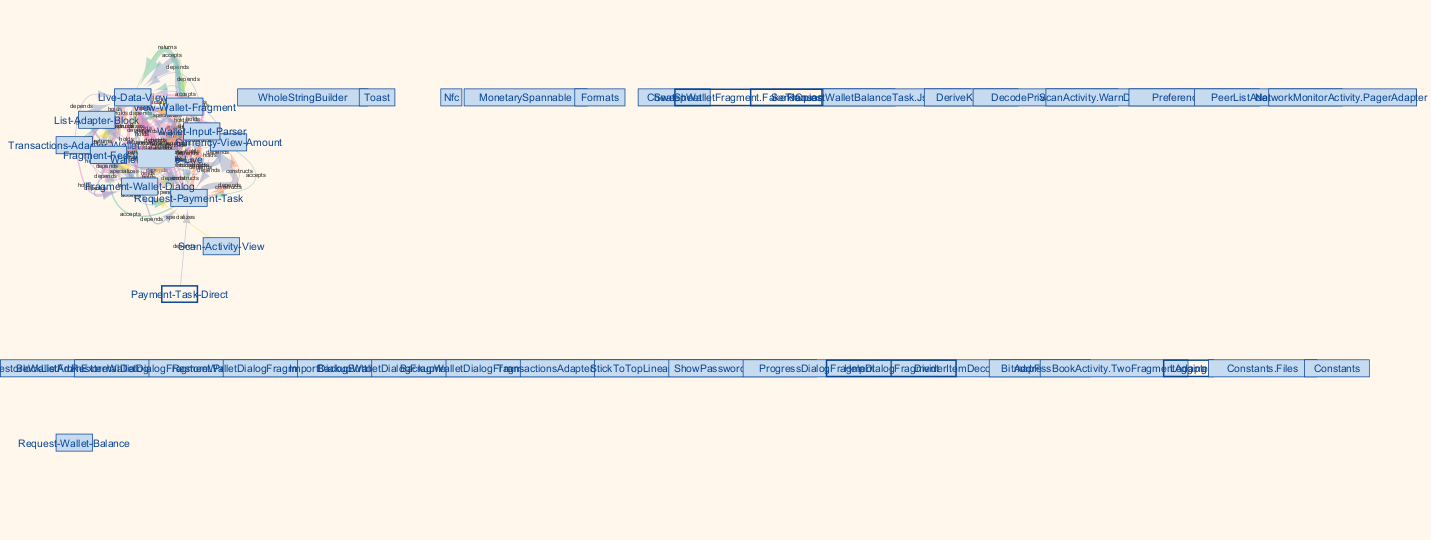

In [23]:
p4c.set_visual_style('SAR')
p4c.notebook_export_show_image()